# Project 2: WeRateDogs

## Introduction

> In this project we will be using 3 different files, which are the twitter-archieve-enhanced.csv,image_prediction which is gotten by using the request library to download it and the tweet_json file.

>After all the file has be gathered, it is then going to be assessed both visually and programmatically.
   **I discovered 7 Quality Issues and 5 Tidiness Issues**

>This issues found in the assessed stage is then cleaned.

>After Cleaning we moved to storing, analyzing and visualization
   **3 Analysis where done and 1 Visualization**

## Data Gathering

>Reading the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

>Using the Requests library to download the tweet image prediction (image_predictions.tsv)

>Reading the json file and creating a dataframe with the constructed list

In [1]:
import pandas as pd
import numpy as np
import requests 
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json

In [2]:
twitter_a=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#creating a folder, checking if the folder name exist or not, requesting the data from the url
folder_name='Image_Prediction'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)   
#downloading one file in binary format
with open(os.path.join(folder_name,url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)
#checking the content of the folder
os.listdir(folder_name)


['image-predictions.tsv']

In [4]:
image_P = pd.read_csv(url, sep='\t')
image_P.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:

# Create a list to store data extracted from the JSON file
json_data = []

# Open the JSON file and iterate through its lines
with open("tweet-json.txt", 'r') as file:
    # Each line in this file represents a JSON object, each of which is composed of a set of objects
    for line in file:
        # Loading the line object
        line_data = json.loads(line)
        
        # Extracting the targeted columns
        tweet_id = line_data["id"]
        favorite_count = line_data["favorite_count"]
        retweet_count = line_data["retweet_count"]
  
        json_data.append({'tweet_id': tweet_id, 
                          'favorite_count': favorite_count, 
                          'retweet_count': retweet_count,
                         
                         })
        
# Create a dataframe out of the constructed list
json_df = pd.DataFrame(json_data, columns=["tweet_id", "favorite_count", "retweet_count"])

json_df.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assessing Data
> Data is been assessed both visually and programmatically

In [6]:
#display of the twitter archieve data frame
twitter_a

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [7]:
#a summary of the data frame
twitter_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
#a sample of the frame
twitter_a.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
385,826848821049180160,NaN,NaN,2017-02-01 17:44:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cupid. He was found in the trash. Now ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826848821...,13,10,Cupid,doggo,None,None,None
819,770655142660169732,NaN,NaN,2016-08-30 16:11:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770655142...,11,10,very,None,None,None,None
551,804475857670639616,NaN,NaN,2016-12-02 00:02:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",HE'S TRYING TO BE HIS OWN PERSON LET HIM GO 13...,NaN,NaN,NaN,https://twitter.com/bvuepd/status/804417859124...,13,10,None,None,None,None,None
610,797236660651966464,NaN,NaN,2016-11-12 00:36:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pancake. She loves Batman and winks li...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/797236660...,12,10,Pancake,None,None,None,None
753,778774459159379968,NaN,NaN,2016-09-22 01:54:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: In case you haven't seen the mo...,7.580996e+17,4.196984e+09,2016-07-27 00:40:12 +0000,"https://vine.co/v/hQJbaj1VpIz,https://vine.co/...",13,10,None,None,None,None,None


In [9]:
#descriptive statisitics of each column
twitter_a.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
#The unqiue value of the column name in the twitter archieve
twitter_a['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [11]:
#checking if the in_reply_to_status_id  in the twitter archieve has null values
twitter_a[twitter_a['in_reply_to_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [12]:
#checking if the in_reply_to_user_id  in the twitter archieve has null values
twitter_a[twitter_a['in_reply_to_user_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [13]:
#checking for duplicates in the expanded urls of the twitter archieve
twitter_a[twitter_a.expanded_urls.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,667182792070062081,NaN,NaN,2015-11-19 03:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Timison. He just told an awful joke bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667182792...,10,10,Timison,None,None,None,None
2293,667152164079423490,NaN,NaN,2015-11-19 01:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pipsy. He is a fluffball. Enjoys trave...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,None,None,None,None
2294,667138269671505920,NaN,NaN,2015-11-19 00:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Extremely intelligent dog here. Has learned to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
2298,667070482143944705,6.670655e+17,4.196984e+09,2015-11-18 20:02:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After much debate this dog is being upgraded t...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None


In [14]:
#displaying the image prediction
image_P

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [15]:
#Summary of the image Prediction data frame
image_P.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
#a desprictive satistical summary 
image_P.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
#displaying a random row of the image prediction dataframe
image_P.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
283,671138694582165504,https://pbs.twimg.com/media/CVBdFahXAAAIe5Y.jpg,1,Samoyed,0.587342,True,Great_Pyrenees,0.268952,True,Pekinese,0.090527,True


In [18]:
#displaying the json tweet data frame
json_df

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


In [19]:
#Summary of the json tweet data frame
json_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [20]:
#a desprictive satistical summary 
json_df.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [21]:
#To check if they are duplicated colums in the 3 dataframe
all_columns = pd.Series(list(twitter_a) + list(image_P) + list(json_df))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

## Assessing Data Conclusion 
> After assessing the data both visual and programmatically, this are the issues found. It was classified into quality and tidiness issues

## Quality issues
>1 Missing Value (reply status id, user id,retweeted_status_id ,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls)  

>2 name column in twitter archive not clearly defined

>3 Sources are defined with hyperlink(instead of urls)

>4 Incorrect datatype for column Timestamp(Datetime instead of object)

>5 p1 ,p2 and p3 column name in Image Prediction not clear(should be renamed)

>6 Filter out data above 08-02-2017

>7 name= none is equivilent to a null value

>8 In the expand url column  some rows have more than one url as value

## Tidiness Issues

>1 Necessary dataframe  Should mergered with twitter archive

>2 doggo,flooer,pupper and poppo should be categorized

>3 Column not needed should be removed




## Cleaning Data

Make copies of original pieces of data

In [22]:

twitter_a_copy=twitter_a.copy()
image_P_copy=image_P.copy()
json_df_copy=json_df.copy()

Display the copy of twitter archieve data frame

In [23]:

twitter_a_copy

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


## Issue 1 - Image Prediction

#### Define
> Changing the p1,p2,p3 name of the image prediction data frame to a descriptive one

#### Code

Displaying the columns in the image predition copy data frame

In [24]:

image_P_copy.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

Changing the column name of the image prediction column

In [25]:

image_P_copy.columns=['tweet_id',
                      'image_Url', 
                       'image_Number',
                      '1st_Prediction',
                      '1st_Prediction_Confidence',
                      '1st_Prediction_isdog',
                      '2nd_Prediction',
                      '2nd_Prediction_Confidence',
                      '2nd_Prediction_isdog',
                      '3rd_Prediction',
                      '3rd_Prediction_Confidence',
                      '3rd_Prediction_isdog']

#### Test

Displaying the image prediction copy data frame


image_P_copy

## Issue 2 - Twitter Archive

#### Define
> Extract Url from the Hyperlink using extract() 

#### Code

Extract URLs from hyperlinks

In [26]:


pattern = r'(https?:\/\/(?:www\.)?[-a-zA-Z0-9@:%._+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}[-a-zA-Z0-9()@:%_+.~#?&/=]*)' 
twitter_a_copy.source = twitter_a_copy.source.str.extract(pattern, expand=False)

#### Test

Display the top of the twitter archieve copy data frame

In [27]:

twitter_a_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Issue 3 - Twitter Archive

#### Define
> Change the datatype of column time stamp to datetime

#### Code

Convert to datetime

In [28]:

twitter_a_copy.timestamp = pd.to_datetime(twitter_a_copy.timestamp)

#### Test

Display the summary of the data frame to see if the data type has been changed

In [29]:

twitter_a_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

## Issue 4 - Twitter Archive

#### Define
>Replace None in Name column in twitter archive as null
>Replace empty value to null

#### Code

Check if in the name column they is none, empty and a values and convert them to null

In [30]:

twitter_a_copy.loc[twitter_a_copy['name'] == "None", 'name'] = np.nan

twitter_a_copy.loc[twitter_a_copy['name'] == " ", 'name'] = np.nan

twitter_a_copy.loc[twitter_a_copy['name'] == "a", 'name'] = np.nan


#### Test

Display 5 random sample of the twitter archieve copy

In [31]:

twitter_a_copy.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1926,674053186244734976,NaN,NaN,2015-12-08 02:29:37+00:00,http://twitter.com/download/iphone,This is Stanley. Yes he is aware of the spoon'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674053186...,10,10,Stanley,None,None,None,None
1749,679047485189439488,NaN,NaN,2015-12-21 21:15:11+00:00,http://twitter.com/download/iphone,This dog doesn't know how to stairs. Quite tra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679047485...,9,10,NaN,None,None,None,None
1812,676811746707918848,NaN,NaN,2015-12-15 17:11:09+00:00,http://twitter.com/download/iphone,Say hello to Penny &amp; Gizmo. They are pract...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676811746...,9,10,Penny,None,None,None,None
519,810284430598270976,NaN,NaN,2016-12-18 00:43:57+00:00,http://twitter.com/download/iphone,This is Phil. He's a father. A very good fathe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/810284430...,13,10,Phil,None,None,None,None
1571,687704180304273409,NaN,NaN,2016-01-14 18:33:48+00:00,http://twitter.com/download/iphone,Say hello to Blakely. He thinks that's a hat. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687704180...,9,10,Blakely,None,None,pupper,None


Check if they is any value in the name column that is empty

In [32]:

twitter_a_copy[twitter_a_copy['name'] == ""]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


## Issue 5 - Twitter Archive

### Define

> Filter out data after 08-02-2017

#### Code

Filter data to exclude records beyond August 1st, 2017, as well as retweets

In [33]:

before = len(twitter_a_copy)
twitter_a_copy= twitter_a_copy[(twitter_a_copy.timestamp < "08/02/2017") & 
                                    (twitter_a_copy.retweeted_status_id.isnull())]
after = len(twitter_a_copy)
removed = before - after
print(removed, " records deleted.")

181  records deleted.


#### Test

Check if the above change has been effected

In [34]:

twitter_a_copy[ twitter_a_copy.timestamp >= "08/02/2017"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


## Issue 6 - Twitter Archive

#### Define
>Fixing the multiple values in the expand_url by creating a user defined url and rename the column

#### Code

Fix tweet URL

In [35]:

def fix_url(row):
    """Takes a row, and it returns twitter URL constructed using the URL pattern used by Twitter"""
    return 'https://twitter.com/dog_rates/status/'+str(row['tweet_id'])+'/photo/1'


twitter_a_copy.expanded_urls = twitter_a_copy.apply(lambda row: fix_url(row), axis=1)
twitter_a_copy.rename(columns={"expanded_urls":"expanded_url"})

C:\Users\levono\AppData\Local\Temp\ipykernel_10508\2368242939.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_a_copy.expanded_urls = twitter_a_copy.apply(lambda row: fix_url(row), axis=1)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_url,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,http://twitter.com/download/iphone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,http://twitter.com/download/iphone,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,http://twitter.com/download/iphone,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,http://twitter.com/download/iphone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,None,None,None,None


#### Test

Display the twitter archieve copy data frame

In [36]:

twitter_a_copy

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,http://twitter.com/download/iphone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,http://twitter.com/download/iphone,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,http://twitter.com/download/iphone,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,http://twitter.com/download/iphone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,None,None,None,None


## Issue 7 - Twitter Archive

#### Define

> Replace all missing values with nan

#### Code

Replace all the empty value in the twitter archieve copy with null

In [37]:

twitter_a_copy =  twitter_a_copy.replace(' ', np.nan)

#### Test

Display 10 random samples of the twitter archieve copy data frame

In [38]:
 
twitter_a_copy.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1790,677530072887205888,NaN,NaN,2015-12-17 16:45:31+00:00,http://twitter.com/download/iphone,Say hello to Axel. He's a Black Chevy Pinot on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677530072...,9,10,Axel,None,None,None,None
1980,672975131468300288,NaN,NaN,2015-12-05 03:05:49+00:00,http://twitter.com/download/iphone,This is Chuckles. He is one skeptical pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672975131...,10,10,Chuckles,None,None,pupper,None
2255,667773195014021121,NaN,NaN,2015-11-20 18:35:10+00:00,http://twitter.com,This is a rare Hungarian Pinot named Jessiga. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667773195...,8,10,NaN,None,None,None,None
854,765222098633691136,NaN,NaN,2016-08-15 16:22:20+00:00,http://twitter.com/download/iphone,This is Gromit. He's pupset because there's no...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765222098...,10,10,Gromit,None,None,None,None
1854,675534494439489536,NaN,NaN,2015-12-12 04:35:48+00:00,http://twitter.com/download/iphone,Seriously guys?! Only send in dogs. I only rat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675534494...,11,10,NaN,None,None,None,None
1189,718246886998687744,NaN,NaN,2016-04-08 01:19:36+00:00,http://twitter.com/download/iphone,This is Alexanderson. He's got a weird ass bir...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718246886...,3,10,Alexanderson,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30+00:00,http://twitter.com/download/iphone,Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,NaN,None,None,None,None
1813,676776431406465024,NaN,NaN,2015-12-15 14:50:49+00:00,http://twitter.com/download/iphone,"When someone yells ""cops!"" at a party and you ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/676776431...,10,10,NaN,None,None,None,None
246,845677943972139009,NaN,NaN,2017-03-25 16:45:08+00:00,http://twitter.com/download/iphone,C'mon guys. Please only send in dogs. We only ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/845677943...,12,10,NaN,None,None,None,None
756,778650543019483137,NaN,NaN,2016-09-21 17:42:10+00:00,http://twitter.com/download/iphone,Meet Strider. He thinks he's a sorority girl. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778650543...,10,10,Strider,None,None,None,None


## Tidiness

## Issue 1 - Twitter Archive

#### Define
> Remove columns not needed

#### Code

Removing columns not needed

In [39]:

twitter_a_copy.drop(columns=["in_reply_to_status_id","in_reply_to_user_id", "retweeted_status_id","retweeted_status_timestamp","retweeted_status_user_id"],inplace=True)

#### Test

Display the top part of the twitter archieve copy dataframe

In [40]:

twitter_a_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Issue 2 - Twitter Archive

### Define
> Merge the Favourite_count and retweet_count to Twitter Archive Table joining with tweetid

#### Code

Merging 2 data frames together based on the tweet id

In [41]:

twitter_a_new = pd.merge(twitter_a_copy, json_df_copy,
                            on=['tweet_id', ], how='left')

#### Test

Display the new data frame

In [42]:

twitter_a_new

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,39467,8853
1,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,33819,6514
2,891815181378084864,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,25461,4328
3,891689557279858688,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,42908,8964
4,891327558926688256,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,41048,9774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2170,666049248165822465,2015-11-16 00:24:50+00:00,http://twitter.com/download/iphone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,None,None,None,None,111,41
2171,666044226329800704,2015-11-16 00:04:52+00:00,http://twitter.com/download/iphone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,None,None,None,None,311,147
2172,666033412701032449,2015-11-15 23:21:54+00:00,http://twitter.com/download/iphone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,None,None,None,None,128,47
2173,666029285002620928,2015-11-15 23:05:30+00:00,http://twitter.com/download/iphone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,None,None,None,None,132,48


## Issue 3 - Twitter Archive

#### Define

>Categorizing the dogs into a new column called category

#### Code

Combining the stages together to form a new column

In [43]:

for index, column in twitter_a_new.iterrows():
    for word in ['puppo', 'pupper', 'doggo', 'floofer']:
        if word.lower() in str(twitter_a_new.loc[index, 'text']).lower():
            twitter_a_new.loc[index, 'dog_stage'] = word.title()
# drop old columns
twitter_a_new.drop(columns=["puppo","pupper","doggo","floofer"],inplace=True)


#### Test

Displaying 20 random samples of the twitter archieve copy data frame

In [44]:

twitter_a_new.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_stage
347,822975315408461824,2017-01-22 01:12:59+00:00,http://twitter.com/download/iphone,This is Albus. He's soaked as h*ck. Seems to h...,https://twitter.com/dog_rates/status/822975315...,12,10,Albus,19139,3958,NaN
1843,672068090318987265,2015-12-02 15:01:33+00:00,http://twitter.com/download/iphone,Say hello to Gizmo. He's upset because he's no...,https://twitter.com/dog_rates/status/672068090...,7,10,Gizmo,1389,564,NaN
2098,667405339315146752,2015-11-19 18:13:27+00:00,http://twitter.com/download/iphone,This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,489,234,NaN
880,741793263812808706,2016-06-12 00:44:30+00:00,http://twitter.com/download/iphone,When your crush won't pay attention to you. Bo...,https://twitter.com/dog_rates/status/741793263...,10,10,NaN,4982,1698,NaN
399,814986499976527872,2016-12-31 00:08:17+00:00,http://twitter.com/download/iphone,This is Cooper. Someone attacked him with a sh...,https://twitter.com/dog_rates/status/814986499...,11,10,Cooper,8485,1505,Pupper
566,785872687017132033,2016-10-11 16:00:24+00:00,http://twitter.com/download/iphone,Meet Rusty. He appears to be rather h*ckin flu...,https://twitter.com/dog_rates/status/785872687...,12,10,Rusty,7489,2130,NaN
1282,694925794720792577,2016-02-03 16:49:55+00:00,http://vine.co,Please only send in dogs. This t-rex is very s...,https://twitter.com/dog_rates/status/694925794...,5,10,NaN,2965,1043,NaN
1962,669993076832759809,2015-11-26 21:36:12+00:00,http://twitter.com/download/iphone,This is Zoey. Her dreams of becoming a hippo b...,https://twitter.com/dog_rates/status/669993076...,9,10,Zoey,344,92,Pupper
1882,671166507850801152,2015-11-30 03:18:59+00:00,http://twitter.com/download/iphone,This is Herm. It's his first day of potty trai...,https://twitter.com/dog_rates/status/671166507...,10,10,Herm,931,390,NaN
377,818536468981415936,2017-01-09 19:14:36+00:00,http://twitter.com/download/iphone,This is Tom. He's a silly dog. Known for his u...,https://twitter.com/dog_rates/status/818536468...,11,10,Tom,12127,2873,NaN


## Issue 4 - Image Prediction

#### Define

> Build function to determine dog breed. if no breed detected, set value to NaN

#### Code

Creating a function 

In [45]:

def get_breed(row):
        if row['1st_Prediction_isdog'] == True:
            return row['1st_Prediction'], row['1st_Prediction_Confidence']
        if row['2nd_Prediction_isdog'] == True:
            return row['2nd_Prediction'], row['2nd_Prediction_Confidence']
        if row['3rd_Prediction_isdog'] == True:
            return row['3rd_Prediction'], row['3rd_Prediction_Confidence']
        return np.nan, np.nan

 # apply function to dataset
 # create new columns with data
image_P_copy[['breed_prediction', 'prediction_confidence']] = pd.DataFrame(image_P_copy.apply(lambda row: get_breed(row), axis = 1).tolist(), index = image_P_copy.index) 

# drop old columns

image_P_copy.drop(columns=["1st_Prediction","1st_Prediction_Confidence","1st_Prediction_isdog","2nd_Prediction","2nd_Prediction_Confidence","2nd_Prediction_isdog","3rd_Prediction","3rd_Prediction_Confidence","3rd_Prediction_isdog"],inplace=True)

 # drop rows without dog breed prediction
image_P_copy.dropna(subset = ['breed_prediction', 'prediction_confidence'], inplace = True)


#### Test

Display 5 random sample of image prediction copy data frame

In [46]:

image_P_copy.sample(5)

,tweet_id,image_Url,image_Number,breed_prediction,prediction_confidence
1545,792050063153438720,https://pbs.twimg.com/media/Cv3tU38WcAASFas.jpg,2,komondor,0.942856
345,672272411274932228,https://pbs.twimg.com/media/CVRkLuJWUAAhhYp.jpg,2,pug,0.914685
662,682638830361513985,https://pbs.twimg.com/media/CXk4W0qWYAMEMEs.jpg,1,English_springer,0.440781
1308,753655901052166144,https://pbs.twimg.com/media/CnWGCpdWgAAWZTI.jpg,1,miniature_pinscher,0.456092
1619,802624713319034886,https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg,1,cocker_spaniel,0.253442


## Issue 5 - Twitter Archive

#### Define
> Merge twitter_a_new with Image prediction

#### Code

Merge the new twitter archieve data frame and image prediction copy data frame

In [47]:

twitter_a_master = pd.merge(twitter_a_new, image_P_copy,
                            on=['tweet_id', ], how='left')

#### Test

Display the twitter archieve master data frame

In [48]:

twitter_a_master

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_stage,image_Url,image_Number,breed_prediction,prediction_confidence
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,39467,8853,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,33819,6514,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,25461,4328,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,42908,8964,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,41048,9774,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2170,666049248165822465,2015-11-16 00:24:50+00:00,http://twitter.com/download/iphone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,111,41,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311
2171,666044226329800704,2015-11-16 00:04:52+00:00,http://twitter.com/download/iphone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,311,147,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,0.408143
2172,666033412701032449,2015-11-15 23:21:54+00:00,http://twitter.com/download/iphone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,128,47,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,0.596461
2173,666029285002620928,2015-11-15 23:05:30+00:00,http://twitter.com/download/iphone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,132,48,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826


# Storing Data

In [49]:
#storing the twitter archive master data frame to a csv file
twitter_a_master.to_csv('Twitter_Archive_Master.csv', index=False)

# Insight and Visualization

In [50]:
#display 5 random sample
twitter_a_master.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_stage,image_Url,image_Number,breed_prediction,prediction_confidence
1049,713909862279876608,2016-03-27 02:05:49+00:00,http://vine.co,This is Doug. His nose is legendary af. 12/10 ...,https://twitter.com/dog_rates/status/713909862...,12,10,Doug,2078,616,NaN,NaN,NaN,NaN,NaN
1492,682393905736888321,2015-12-31 02:52:40+00:00,http://twitter.com/download/iphone,This is Kreg. He's riding an invisible jet ski...,https://twitter.com/dog_rates/status/682393905...,11,10,Kreg,2441,773,NaN,https://pbs.twimg.com/media/CXhZom1UwAA4Zz6.jpg,1.0,vizsla,0.657275
554,787717603741622272,2016-10-16 18:11:26+00:00,http://twitter.com/download/iphone,This is Tonks. She is a service puppo. Can hea...,https://twitter.com/dog_rates/status/787717603...,13,10,Tonks,11416,3240,Puppo,https://pbs.twimg.com/media/Cu6I9vvWIAAZG0a.jpg,3.0,German_shepherd,0.992339


In [51]:
#display summary of the data frame
twitter_a_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   timestamp              2175 non-null   datetime64[ns, UTC]
 2   source                 2175 non-null   object             
 3   text                   2175 non-null   object             
 4   expanded_urls          2175 non-null   object             
 5   rating_numerator       2175 non-null   int64              
 6   rating_denominator     2175 non-null   int64              
 7   name                   1440 non-null   object             
 8   favorite_count         2175 non-null   int64              
 9   retweet_count          2175 non-null   int64              
 10  dog_stage              385 non-null    object             
 11  image_Url              1686 non-null   object           

## Insight 1

> Check which is the most common dog breed  and least common dog breed in the new dataframe (twitter archive, image prediction and json tweet file)

In [52]:
#display the top 10 dog breed
twitter_a_master['breed_prediction'].value_counts()[:10]

golden_retriever      158
Labrador_retriever    108
Pembroke               95
Chihuahua              91
pug                    62
toy_poodle             51
chow                   48
Samoyed                42
Pomeranian             42
malamute               33
Name: breed_prediction, dtype: int64

In [53]:
#display the 10 least popular dog breeds
twitter_a_master['breed_prediction'].value_counts().tail(10)

black-and-tan_coonhound    2
wire-haired_fox_terrier    2
Bouvier_des_Flandres       1
silky_terrier              1
clumber                    1
Scotch_terrier             1
EntleBucher                1
Japanese_spaniel           1
standard_schnauzer         1
Irish_wolfhound            1
Name: breed_prediction, dtype: int64

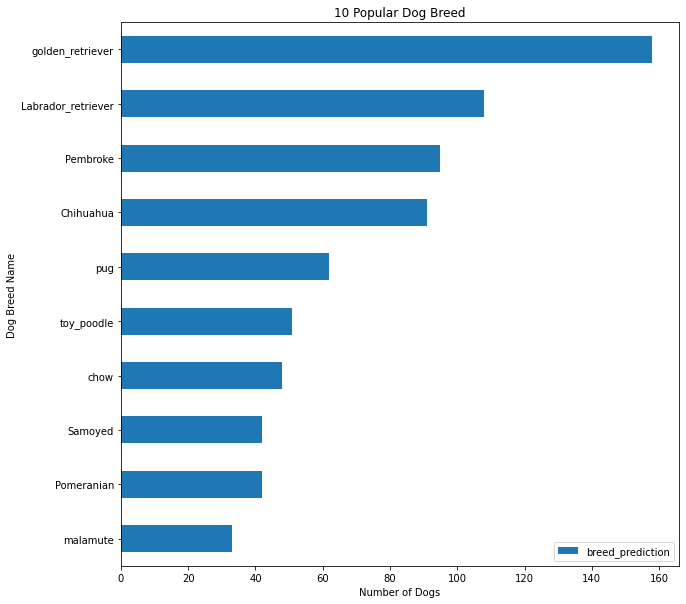

In [54]:
#10 popular dog breeds
dog_breeds = pd.DataFrame(twitter_a_master.breed_prediction.value_counts()[:10])

dog_breeds.plot(kind="barh", figsize=(10,10))
plt.title("10 Popular Dog Breed")
plt.xlabel("Number of Dogs")
plt.ylabel("Dog Breed Name")
plt.gca().invert_yaxis()
plt.show();


The most popular breed is the GOLDEN RETRIVER among the breeds of dogs and the least popular breads are
(Bouvier_des_Flandres,silky_terrier , clumber,Scotch_terrier,EntleBucher,Japanese_spaniel ,standard_schnauzer ,Irish_wolfhound)

## Insight 2
> What stage of dogs do people prefer?

In [55]:
twitter_a_master['dog_stage'].value_counts()

Pupper     250
Doggo       94
Puppo       31
Floofer     10
Name: dog_stage, dtype: int64

People prefer dogs that are at the pupper Stage and floofer is the least prefered

## Insight 3
> Whats the most popular name given to the dogs and their likely gender?

In [56]:
twitter_a_master['name'].value_counts()

Lucy          11
Charlie       11
Oliver        10
Cooper        10
Tucker         9
              ..
Wishes         1
Rose           1
Theo           1
Fido           1
Christoper     1
Name: name, Length: 954, dtype: int64

The most popular name are lucy and charlie lucy is a female name so likely the female dogs are named and charlie for the male dogs